# Pichu or Pikachu?

In [1]:
def load_data(TRAIN_DATA, TEST_DATA):

#################################################################################### Training data

    with open(TRAIN_DATA, "r") as file: 
        TRAINING_ROWS = [training_row.strip("\n").split(", ") for training_row in file.readlines()[1:]]


    TRAINING_POINTS = []
    for training_row in TRAINING_ROWS:
        FORMATED_TRAINING_ROWS = [int(value) if value.isdigit() else float(value) for value in training_row ]
        TRAINING_POINTS.append(FORMATED_TRAINING_ROWS)


    TRAINING_WIDTH = [width[0] for width in TRAINING_POINTS]
    TRAINING_HEIGHT = [height[1] for height in TRAINING_POINTS]
    TRAINING_LABEL = [label[2] for label in TRAINING_POINTS]

    TRAINING_COLUMNS = {'Width':TRAINING_WIDTH, 'Height':TRAINING_HEIGHT, 'Label':TRAINING_LABEL} #Dictionary to plot



#################################################################################### Test data



    with open(TEST_DATA, "r") as file:
        TEST_ROWS = [test_row[:-2].split(" (") for test_row in file.readlines()[1:]]

    TEST_ROWS = [test_row[1].split(", ") for test_row in TEST_ROWS]

    TEST_WIDTH = [float(test_width[0]) for test_width in TEST_ROWS]
    TEST_HEIGHT = [float(test_height[1]) for test_height in TEST_ROWS]


    TEST_POINTS = []
    for test_row in TEST_ROWS:
        FORMATED_TEST_ROWS = [ [float(value) for value in test_row ] ]
        TEST_POINTS.append(FORMATED_TEST_ROWS)



    return TRAINING_COLUMNS, [TEST_WIDTH, TEST_HEIGHT]


In [2]:
def graph(TRAINING_COLUMNS):

    g = sns.relplot(data=TRAINING_COLUMNS, x='Width', y='Height', hue='Label', hue_order=[0,1])
    g._legend.texts[0].set_text("Pichu")
    g._legend.texts[1].set_text("Pikachu")


    plt.show()

#https://stackoverflow.com/questions/14885895/color-a-scatter-plot-by-column-values


In [3]:
def classifying(TRAINING_COLUMNS, TEST_WIDTH, TEST_HEIGHT, SINGLE_NEIGHBOR = None): #SINGLE_NEIGHBOR keyword for function to be reused


    ALL_NEIGHBOURS = []
    for p1, p2 in zip(TEST_WIDTH, TEST_HEIGHT): # distance calculated with Euclidean formula: sqrt( (p1-q1)^2 + (p2-q2)^2... ) 

        DISTANCE_LIST = [ (( (p1-qx)**2  + (p2-qy)**2 )**(1/2), TRAINING_COLUMNS['Label'][idx], idx) for idx, (qx, qy) in enumerate(zip(TRAINING_COLUMNS['Width'], TRAINING_COLUMNS['Height'])) ] #(distance, label, idx)
        ALL_NEIGHBOURS.append(DISTANCE_LIST)


    NEAREST_NEIGHBOURS = [] 
    for distances in ALL_NEIGHBOURS:
        distances.sort()
        NEAREST_NEIGHBOURS.append(distances[:10])


 ####################################################################################


    PREDICTED_LABEL = []

    for idx, neighbours in enumerate(NEAREST_NEIGHBOURS):

        PIKACHU_VOTES, DISTANCE_TO_PIKACHU, DISTANCE_TO_PICHU = 0,0,0


        if SINGLE_NEIGHBOR: # for testpoint.txt
 
            for neighbor in neighbours[:1]:

                if neighbor[1] == 1:
                    PIKACHU_VOTES += 1
            
            if PIKACHU_VOTES > 0:
                print(f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pikachu")

            else:
                print(f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pichu")


        else: # for shuffled_testpoints.txt

            for neighbor in neighbours:


                if neighbor[1] == 1:
                    PIKACHU_VOTES += 1
                    DISTANCE_TO_PIKACHU += neighbor[0]

                else:
                    DISTANCE_TO_PICHU += neighbor[0]


            if PIKACHU_VOTES > 5:
                PREDICTED_LABEL.append(1)

            elif PIKACHU_VOTES < 5:
                PREDICTED_LABEL.append(0)

            elif PIKACHU_VOTES == 5:
                print(f"Tie, decided by closest single neighbour: ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])})")

                if DISTANCE_TO_PICHU > DISTANCE_TO_PIKACHU:
                    PREDICTED_LABEL.append(1)

                else:
                    PREDICTED_LABEL.append(0)


            if PIKACHU_VOTES > 5:
                print(f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pikachu")

            else:
                print(f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pichu")


    print("*********")            

    return PREDICTED_LABEL
 


In [4]:
def test_new_point(TRAINING_COLUMNS = None):

    while True: #Loop to retry if accidental string or negative int/float

        try:

            NEW_WIDTH = float(input("Enter width: "))
            NEW_HEIGHT = float(input("Enter height: "))
            
        except ValueError:

            print( "Error: Both inputs must be integers or floating-point numbers.")
            continue

        if NEW_WIDTH < 0 or NEW_HEIGHT < 0:
            print("Error: Both inputs must be positive")
        else:
            classifying(TRAINING_COLUMNS, [NEW_WIDTH], [NEW_HEIGHT] )
            return #return to menu once test point classified



In [5]:
def shuffle_data():


    with open("datapoints.txt", "r") as file:
        DATAROWS = [row.strip("\n").split(", ") for row in file.readlines()[1:]]

    DATAPOINTS = []
    for datarow in DATAROWS:
        FORMATED_ROW = [int(values) if values.isdigit() else float(values) for values in datarow ]
        DATAPOINTS.append(FORMATED_ROW)

    random.shuffle(DATAPOINTS)

    SHUFFLED_TEST_SET, SHUfFLED_TRAIN_SET, SHUFFLED_LABELS = [], [], []
    PIK, PICH = 0, 0


    for point in DATAPOINTS:
        if point[-1] == 1 and PIK < 25:
            PIK +=1
            SHUFFLED_TEST_SET.append(point)
        elif point[-1] == 0 and PICH < 25:
            PICH += 1
            SHUFFLED_TEST_SET.append(point)
        else:
            SHUfFLED_TRAIN_SET.append(point)


####################################################################################


    with open("shuffled_datapoints.txt", "w") as file:
        file.write("(width (cm), height (cm), label (0-pichu, 1-pikachu))" + '\n')

        for shuffled_data_point in SHUfFLED_TRAIN_SET:
            file.write(f"{shuffled_data_point[0]}, {shuffled_data_point[1]}, {shuffled_data_point[2]}" + '\n')
    

    with open("shuffled_testpoints.txt", "w") as file:
        file.write("Test points:" + '\n')
        
        for idx, shuffled_test_point in enumerate(SHUFFLED_TEST_SET, 1):
            file.write(f"{idx}. ({shuffled_test_point[0]}, {shuffled_test_point[1]})" + '\n')
            SHUFFLED_LABELS.append(shuffled_test_point[2])

    
    return SHUFFLED_LABELS



In [6]:
def test_accuracy():

    AVERAGE_ACCURACIES = []

    for n in range(1,11):
        REAL_LABELS = shuffle_data()
        print(f"Shuffle {n} done!")

        SHUFFLED_TRAIN_DATA, SHUFFLED_TEST_DATA = load_data("shuffled_datapoints.txt", "shuffled_testpoints.txt")
        PREDICTED_LABELS = classifying(SHUFFLED_TRAIN_DATA, SHUFFLED_TEST_DATA[0], SHUFFLED_TEST_DATA[1])
        

####################################################################################


        TP, TN, FP, FN = 0,0,0,0

        for real, predicted in zip(REAL_LABELS, PREDICTED_LABELS):
            if real == 1 and real == predicted:
                TP += 1
            elif real == 1 and real != predicted:
                FP += 1
            elif real == 0 and real == predicted:
                TN += 1
            elif real == 0 and real != predicted:
                FN += 1


        ACCURACY = (TP + TN) / (TP + FP + TN + FN)    
        AVERAGE_ACCURACIES.append(ACCURACY)


    AVERAGE_ACCURACY = sum(AVERAGE_ACCURACIES)/len(AVERAGE_ACCURACIES)*100
    print(f'{AVERAGE_ACCURACY}%')


    plt.scatter([1,2,3,4,5,6,7,8,9,10], AVERAGE_ACCURACIES, c="blue")
    plt.show()


###Pichu or Pikachu?###

[1] Plot datapoints
[2] Pichu or Pickahu? (Nearest Neighbour)
[3] Pichu or Pikachu (10 Nearest Neighbour)
[4] Add datapoints to testpoints
[5] Test accuracy (10 Nearest Neighbour)
[6] Exit

What would you like to do?



C:\Users\hemli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hemli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hemli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

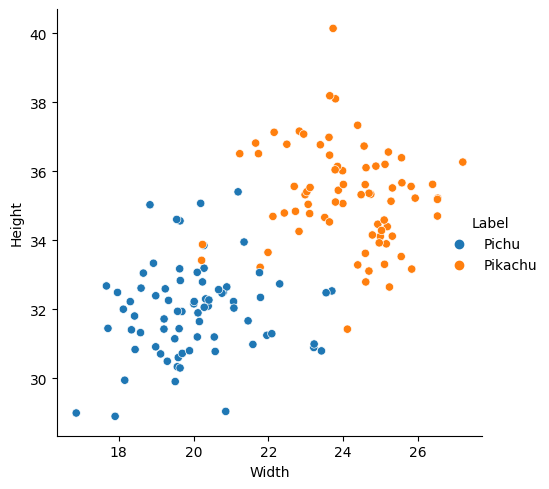

Sample with (width, height) (25.0, 32.0) classified as Pikachu
Sample with (width, height) (24.2, 31.5) classified as Pikachu
Sample with (width, height) (22.0, 34.0) classified as Pikachu
Sample with (width, height) (20.5, 34.0) classified as Pichu
*********
Sample with (width, height) (25.0, 32.0) classified as Pikachu
Tie, decided by closest single neighbour: (24.2, 31.5)
Sample with (width, height) (24.2, 31.5) classified as Pichu
Sample with (width, height) (22.0, 34.0) classified as Pikachu
Sample with (width, height) (20.5, 34.0) classified as Pichu
*********
Sample with (width, height) (22.3, 33.0) classified as Pichu
*********
Shuffle 1 done!
Sample with (width, height) (19.592545899041802, 30.59392660926762) classified as Pichu
Sample with (width, height) (23.792145242488125, 35.107650004447365) classified as Pikachu
Sample with (width, height) (18.836400960218388, 35.028108243261656) classified as Pichu
Sample with (width, height) (23.417849657642716, 30.787174197048245) cla

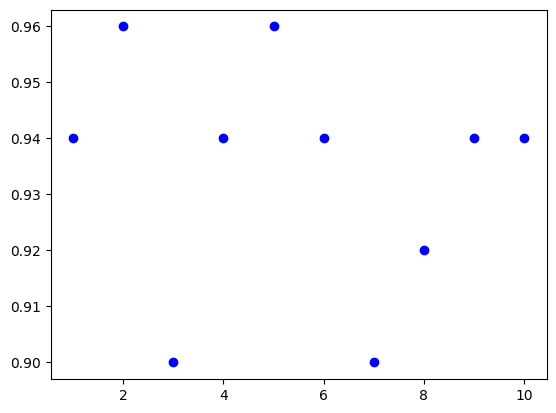

Thank you, please come again!


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

def menu():

    print("###Pichu or Pikachu?###")
    print("")
    print("[1] Plot datapoints")
    print("[2] Pichu or Pickahu? (Nearest Neighbour)")
    print("[3] Pichu or Pikachu (10 Nearest Neighbour)")
    print("[4] Add datapoints to testpoints")
    print("[5] Test accuracy (10 Nearest Neighbour)")
    print("[6] Exit")

    print("")
    print("What would you like to do?")
    print("")



    while True:
        TRAIN_DATA, TEST_DATA = load_data("datapoints.txt", "testpoints.txt")

        try:
            CHOICE = int(input("Pick number from 1-6"))

            if CHOICE < 0:
                print(">>> You input a negative integer. Input must be positive, try again.")       

        except ValueError as e:
            print(">>> You input string character(s). Input must be an integer, try again.")
            continue



        if CHOICE == 1:
            graph(TRAIN_DATA)
        elif CHOICE == 2:
            classifying(TRAIN_DATA, TEST_DATA[0], TEST_DATA[1], SINGLE_NEIGHBOR = True)
        elif CHOICE == 3:
            classifying(TRAIN_DATA, TEST_DATA[0], TEST_DATA[1])
        elif CHOICE == 4:
            test_new_point(TRAIN_DATA)
        elif CHOICE == 5:
            test_accuracy() 
        elif CHOICE == 6:
            print("Thank you, please come again!")
            break

if __name__ == "__main__":
    menu()
